### MODELOS MACHINE LEARNING ANTES DE LA TRANSFORMACIÓN BOX-COX

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb


In [12]:
image = cv2.imread('/Users/sebastianandresvidalsalado/Desktop/Codigos ML/luna/boxcox.png')
ground_truth = cv2.imread('/Users/sebastianandresvidalsalado/Desktop/Codigos ML/luna/ground_luna.png',cv2.IMREAD_GRAYSCALE) 

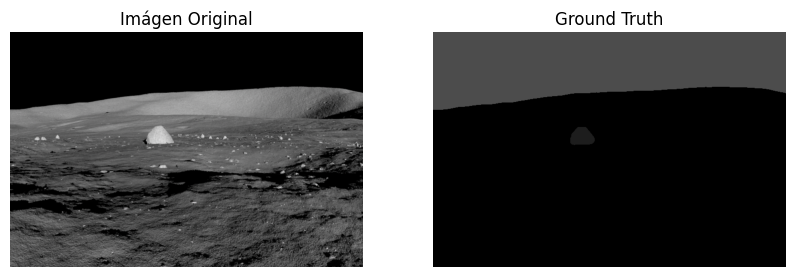

In [13]:
# Convertir de BGR a RGB para mostrar correctamente con matplotlib
imagen1_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imagen2_rgb = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB)
# Mostrar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen1_rgb)
plt.title('Imágen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen2_rgb)
plt.title('Ground Truth')
plt.axis('off')

plt.show()

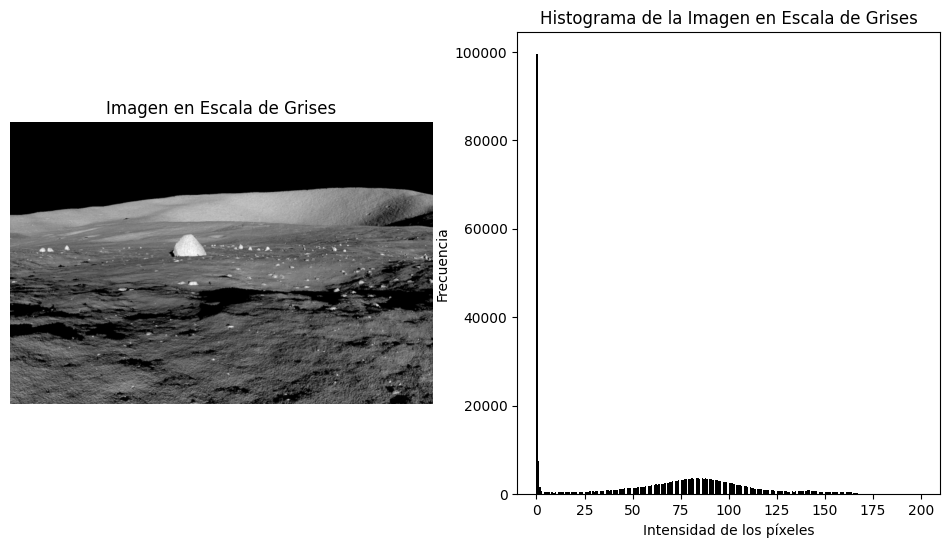

In [14]:
# Convertir la imagen RGB a escala de grises
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Imagen en Escala de Grises")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

# Calcular y mostrar el histograma de la imagen en escala de grises
plt.subplot(1, 2, 2)
plt.title("Histograma de la Imagen en Escala de Grises")
plt.hist(image_gray.ravel(), bins=256, range=[0, 200], color='black')
plt.xlabel('Intensidad de los píxeles')
plt.ylabel('Frecuencia')

plt.show()

In [15]:
# Reshape de las imágenes para hacer la segmentación
X = image.reshape((-1, 3))  # Características RGB
y = ground_truth.reshape((-1,))  # Reshape del ground truth a 1D

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SVM

In [9]:

# Definir el modelo
svm = LinearSVC()

# Definir el rango de hiperparámetros para optimización
param_grid = {
    'C': [0.1, 1, 100],  # Diferentes valores para el parámetro de regularización
    'max_iter': [1000, 2000, 5000],  # Número máximo de iteraciones para converger
    'tol': [1e-4,1e-2]  # Tolerancia para detener el criterio
}

# Implementar GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Usar el mejor modelo encontrado para predecir
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto

Mejores parámetros encontrados: {'C': 100, 'max_iter': 5000, 'tol': 0.01}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
y_pred_svm = best_svm.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     75544
          29       0.00      0.00      0.00       447
          76       0.90      0.98      0.94     27689

    accuracy                           0.96    103680
   macro avg       0.63      0.65      0.64    103680
weighted avg       0.96      0.96      0.96    103680



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [12]:
y_pred_full_svm = best_svm.predict(X)
segmented_image_svm = y_pred_full_svm.reshape(ground_truth.shape)

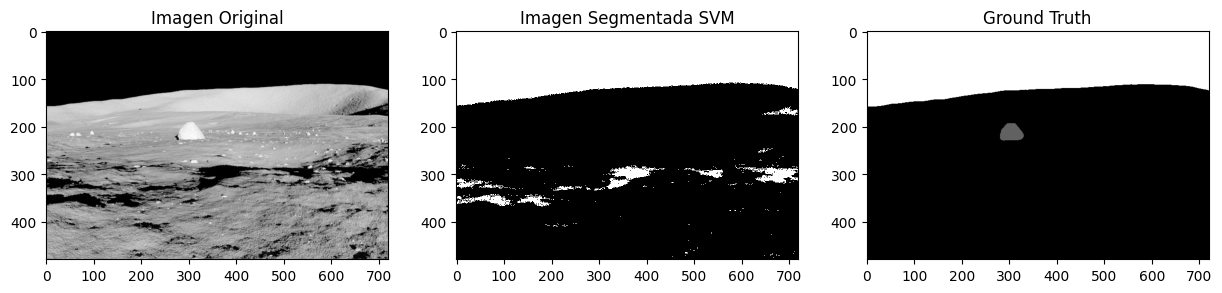

In [13]:
colors_svm = ['black','gray', 'white']
cmap_svm = mcolors.ListedColormap(colors_svm)

# Mostrar la imagen original, segmentada con SVM y la Ground Truth
plt.figure(figsize=(15, 5))

# Imagen Original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Imagen Segmentada con SVM
plt.subplot(1, 3, 2)
plt.title("Imagen Segmentada SVM")
plt.imshow(segmented_image_svm, cmap=cmap_svm)

# Ground Truth
plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap='gray')

plt.show()

## LIGHTGBM

In [6]:
param_grid = {
    'num_leaves': [31, 60],
    'learning_rate': [0.1],
    'n_estimators': [200, 500],
    'min_child_samples': [20, 50],
    'boosting_type': ['gbdt', 'dart'],
    'reg_alpha': [0],                    
    'reg_lambda': [0, 1] 
}
# Configurar el modelo LightGBM con GridSearchCV para optimizar los hiperparámetros
lgbm = lgb.LGBMClassifier()
grid_search = GridSearchCV(lgbm, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_lgbm = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 193536, number of used features: 3
[LightGBM] [Info] Start training from score -0.316626
[LightGBM] [Info] Start training from score -5.508810
[LightGBM] [Info] Start training from score -1.319213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 193536, number of used features: 3
[LightGBM] [Info] Start training from score -0.316633
[LightGBM] [Info] Start training from score -5.508810
[LightGBM] [Info] Start trai

In [7]:
y_pred_gbm = best_lgbm.predict(X_test)

print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     75544
          29       0.78      0.73      0.75       447
          76       0.91      0.98      0.94     27689

    accuracy                           0.97    103680
   macro avg       0.89      0.89      0.89    103680
weighted avg       0.97      0.97      0.97    103680



In [9]:
y_pred_full_gbm = best_lgbm.predict(X)
segmented_image_gbm = y_pred_full_gbm.reshape(ground_truth.shape)

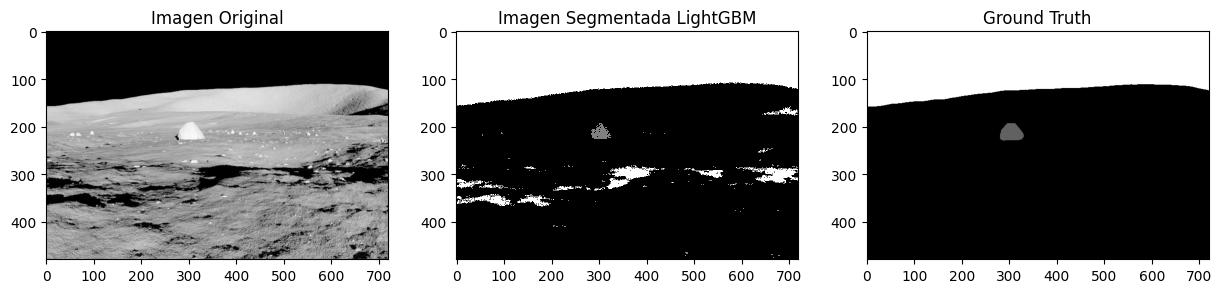

In [12]:
colors_gbm = ['black','gray', 'white']
cmap_gbm = mcolors.ListedColormap(colors_gbm)

# Mostrar la imagen original, segmentada con LightGBM y Ground Truth
plt.figure(figsize=(15, 5))

# Imagen Original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Imagen Segmentada con LightGBM
plt.subplot(1, 3, 2)
plt.title("Imagen Segmentada LightGBM")
plt.imshow(segmented_image_gbm, cmap=cmap_gbm)

# Ground Truth
plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap='gray')  # Puedes usar 'gray' o cualquier otro colormap

plt.show()

## LDA

In [17]:
lda = LinearDiscriminantAnalysis()

# Definir la malla de hiperparámetros
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],               # Diferentes métodos de solución
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],       # Varios niveles de shrinkage para regularización (aplicable a 'lsqr' y 'eigen')
    'n_components': [None, 1, 2, 3],                  # Cantidad de componentes lineales
    'store_covariance': [True, False],                # Guardar la matriz de covarianza
    'tol': [1e-4, 1e-3, 1e-2],                       # Tolerancia para la convergencia en algunos solvers
}

# Configurar GridSearchCV
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_lda = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.0001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.0001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.0001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.0001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.0001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, store_covariance=True, tol=0.001; total time=   0.1s
[CV] END n_components=None, shrinkage=None, solver=svd, sto

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/

In [18]:
y_pred_lda = best_lda.predict(X_test)

print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     75544
          29       0.78      0.70      0.74       447
          76       0.77      0.99      0.87     27689

    accuracy                           0.92    103680
   macro avg       0.85      0.86      0.85    103680
weighted avg       0.93      0.92      0.92    103680



In [19]:
cm = confusion_matrix(y_test, y_pred_lda)

# Convertir a porcentajes por fila
cm_percentage_row = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Imprimir la matriz de confusión en porcentajes por fila
print("Matriz de Confusión (Porcentaje sobre el total de cada fila):")
print(cm_percentage_row)

Matriz de Confusión (Porcentaje sobre el total de cada fila):
[[88.89124219  0.11516467 10.99359314]
 [29.75391499 70.24608501  0.        ]
 [ 0.79092781  0.         99.20907219]]


In [20]:
y_pred_full_lda = best_lda.predict(X)
segmented_image_lda = y_pred_full_lda.reshape(ground_truth.shape)

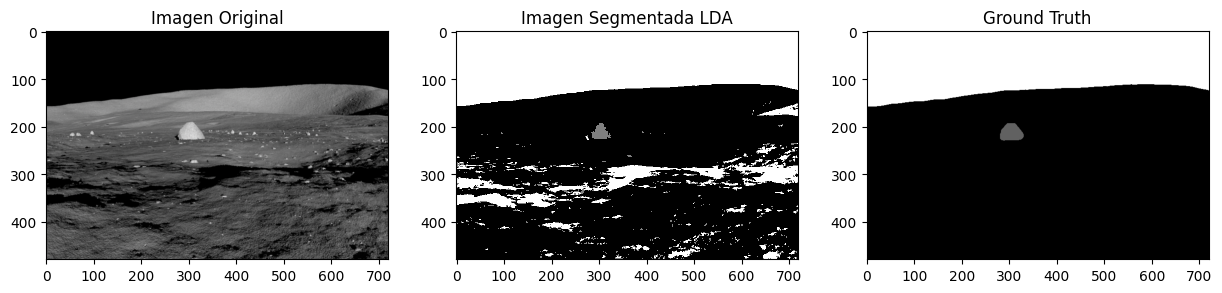

In [21]:
colors_lda = ['black','gray', 'white'] 
cmap_lda = mcolors.ListedColormap(colors_lda)

# Mostrar la imagen original, segmentada con LDA y la Ground Truth
plt.figure(figsize=(15, 5))

# Imagen Original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Imagen Segmentada con LDA
plt.subplot(1, 3, 2)
plt.title("Imagen Segmentada LDA")
plt.imshow(segmented_image_lda, cmap=cmap_lda)

# Ground Truth
plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap='gray')  # Aquí puedes usar 'gray' o cualquier otro colormap

plt.show()

## KNN

In [22]:
# Definir el modelo base con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Definir la malla de hiperparámetros
param_grid = {
    'weights': ['uniform', 'distance'],  # Tipos de pesos
    'metric': ['euclidean'
               , 'manhattan', 'minkowski'],  # Diferentes métricas de distancia
    'p': [1, 2]  # Parámetro de la métrica Minkowski (p=1 -> manhattan, p=2 -> euclidean)
}

# Configurar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_knn = grid_search.best_estimator_

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'metric': 'euclidean', 'p': 1, 'weights': 'uniform'}


In [23]:
y_pred_knn = best_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     62921
          29       0.74      0.66      0.70       385
          76       0.91      0.98      0.94     23094

    accuracy                           0.96     86400
   macro avg       0.88      0.87      0.87     86400
weighted avg       0.97      0.96      0.96     86400



In [24]:
# Predicción en la imagen completa
y_pred_full_knn = best_knn.predict(X)
segmented_image_knn = y_pred_full_knn.reshape(ground_truth.shape)


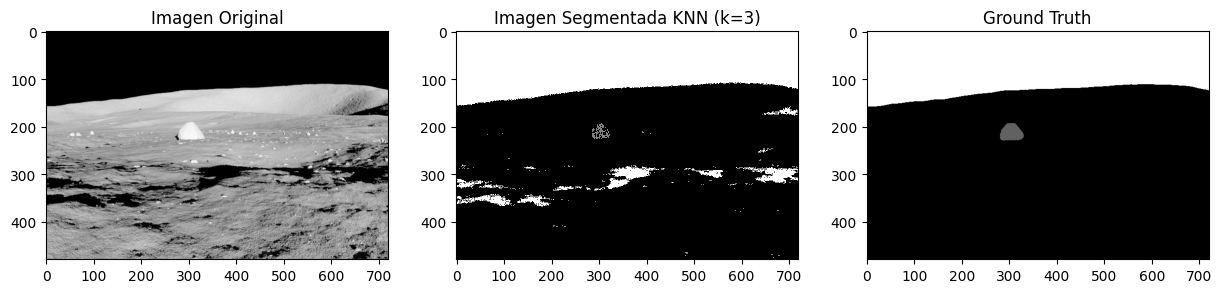

In [26]:

colors_knn = ['black','gray', 'white']
cmap_knn = mcolors.ListedColormap(colors_knn)

# Mostrar la imagen original, segmentada con KNN Ground Truth
plt.figure(figsize=(15, 5))

# Imagen Original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Imagen Segmentada con KNN
plt.subplot(1, 3, 2)
plt.title("Imagen Segmentada KNN (k=3)")
plt.imshow(segmented_image_knn, cmap=cmap_knn)

# Ground Truth
plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap='gray')  # Aquí puedes usar 'gray' o cualquier otro colormap

plt.show()

## QDA

In [21]:
# Crear el modelo QDA
qda = QuadraticDiscriminantAnalysis()

# Definir la malla de hiperparámetros
param_grid = {
    'reg_param': [0.1, 0.5, 1.0],  # Parámetro de regularización
    'tol': [1e-4, 1e-2],          # Tolerancia para la convergencia
    'store_covariance': [True, False],  # Almacenar la matriz de covarianza
    'store_covariance': [True, False],  # Almacenar la matriz de covarianza
}

# Configurar GridSearchCV
grid_search = GridSearchCV(qda, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los datos de entrenamiento y la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_qda = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'reg_param': 0.1, 'store_covariance': True, 'tol': 0.0001}


In [22]:
# Predicción en el conjunto de prueba
y_pred_qda = best_qda.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     75544
          29       0.00      0.00      0.00       447
          76       0.86      0.98      0.92     27689

    accuracy                           0.95    103680
   macro avg       0.62      0.64      0.63    103680
weighted avg       0.95      0.95      0.95    103680



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [23]:
cm = confusion_matrix(y_test, y_pred_lda)

# Convertir a porcentajes por fila
cm_percentage_row = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Imprimir la matriz de confusión en porcentajes por fila
print("Matriz de Confusión (Porcentaje sobre el total de cada fila):")
print(cm_percentage_row)

Matriz de Confusión (Porcentaje sobre el total de cada fila):
[[ 90.58694271   0.           9.41305729]
 [100.           0.           0.        ]
 [  0.82704323   0.          99.17295677]]


In [24]:
# Predicción en la imagen completa
y_pred_full_qda = best_qda.predict(X)
segmented_image_qda = y_pred_full_qda.reshape(ground_truth.shape)

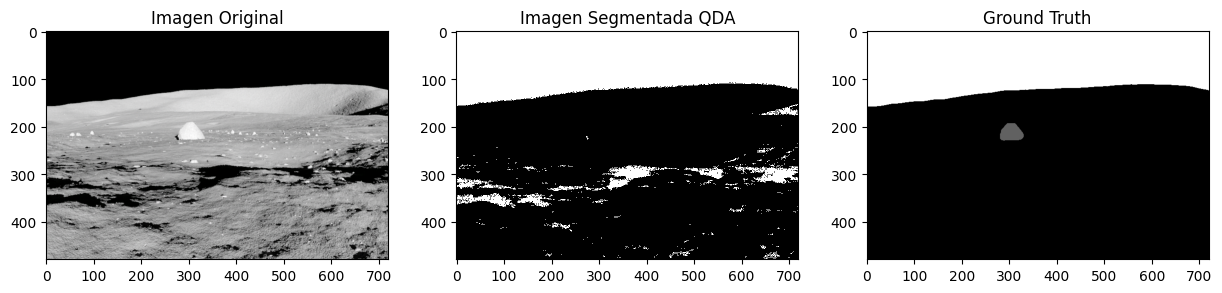

In [25]:
colors_knn = ['black','gray', 'white']
cmap_knn = mcolors.ListedColormap(colors_knn)

# Mostrar la imagen original, segmentada con QDA y Ground Truth
plt.figure(figsize=(15, 5))

# Imagen Original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Imagen Segmentada con KNN
plt.subplot(1, 3, 2)
plt.title("Imagen Segmentada QDA")
plt.imshow(segmented_image_qda, cmap=cmap_knn)

# Ground Truth
plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap='gray')

plt.show()